### Data Visualization

### I always belive that ML and AI is more like the "Blend of Art and Science" together.

    #In This notebook we will get  familiar with our dataset in hand.


### Dataset : "Lettuce_disease_datasets"

The dataset contains total of 2337 images belonging to 8 distinct classes of leafes.
Our Aim is to create a Machine Learning - Computer Vision Approach to classify Healthy Lettuce Leafes .

# The images are stored in different folders. I have mapped the names of images to 3-4 charectors long .
# This technique ensures data consistency and better handling during split.
Named :-------

1.Bacterial : BACT
2.Downey_Mildew_on_Lettuce : DML
3.Healthy : HLTY
4.Powdery_Mildew_on_lettuce : PML
5.Septorial_Blight_on_Lettuce : SBL
6.Shephed_Purse_weed : SPW
7.Viral : VIRL
8.Wilt_and_leaf_blight_on_lettuce : WLBL


In [ ]:
### I have named the images with "4-Charector_Encoding" + number

In [ ]:
# The below code convert the name formatting according to our need
import os


def rename_images_in_folder(folder_path):
    # List all files in the folder
    files = [
        f
        for f in os.listdir(folder_path)
        if os.path.isfile(os.path.join(folder_path, f))
    ]
    # Sort files for consistent ordering (optional)
    files.sort()
    for idx, filename in enumerate(files):
        # Get file extension
        ext = os.path.splitext(filename)[1]
        new_name = f"WLBL_{idx}{ext}"
        src = os.path.join(folder_path, filename)
        dst = os.path.join(folder_path, new_name)
        os.rename(src, dst)
    print(f"Renamed {len(files)} files in {folder_path}")


# Example usage:
rename_images_in_folder(
    "F:\Lettuce_leaf_classification\Lettuce_disease_datasets\Wilt_and_leaf_blight_on_lettuce"
)

Renamed 6 files in F:\Lettuce_leaf_classification\Lettuce_disease_datasets\Wilt_and_leaf_blight_on_lettuce


In [ ]:
### Lets Visualize all the images at once belonging to vari

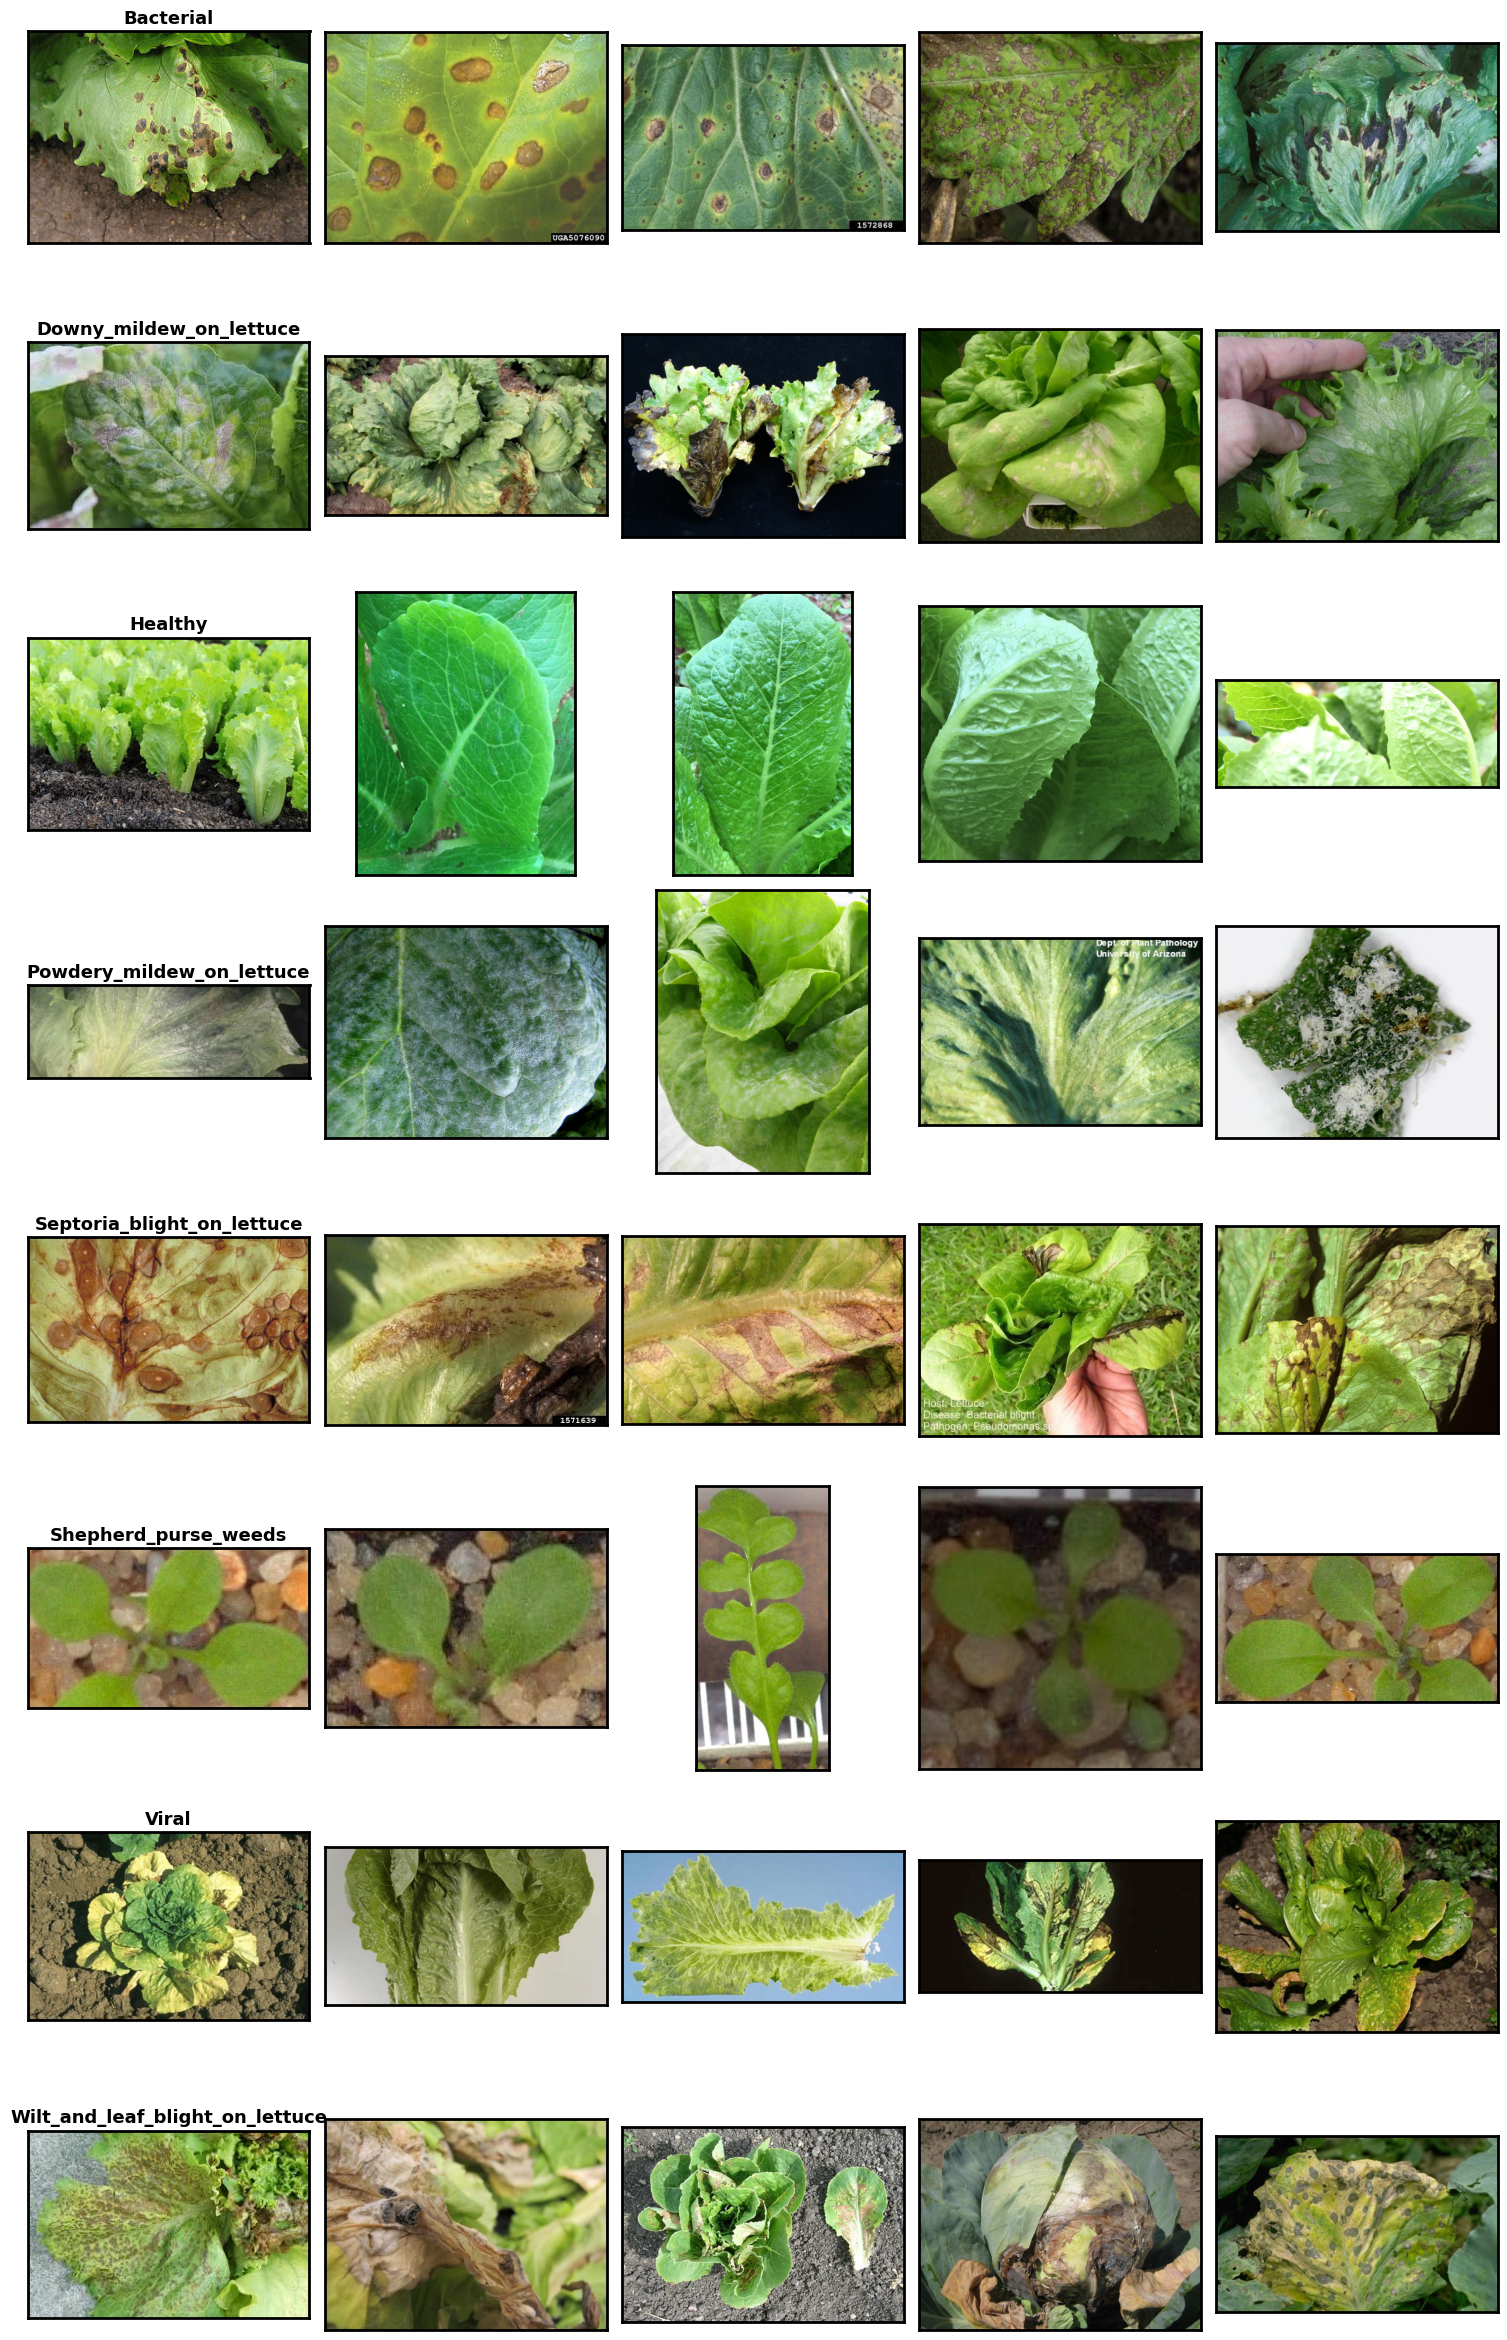

In [ ]:
import os
import matplotlib.pyplot as plt
import random



def plot_class_samples(dataset_dir, n_images=5):

    class_folders = [
        d
        for d in os.listdir(dataset_dir)

        if os.path.isdir(os.path.join(dataset_dir, d))
    ]
    class_folders.sort()


    n_classes = len(class_folders)


    fig, axes = plt.subplots(n_classes, n_images, figsize=(n_images * 3, n_classes * 3))

    for row, class_name in enumerate(class_folders):

        class_path = os.path.join(dataset_dir, class_name)

        images = [
            f

            for f in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, f))
        ]

        sample_imgs = random.sample(images, min(n_images, len(images)))

        for col in range(n_images):

            ax = axes[row, col] if n_classes > 1 else axes[col]

            ax.set_xticks([])

            ax.set_yticks([])

            # Draw border for clarity

            for spine in ax.spines.values():

                spine.set_edgecolor("black")

                spine.set_linewidth(2)

            if col < len(sample_imgs):

                img_path = os.path.join(class_path, sample_imgs[col])

                img = plt.imread(img_path)

                ax.imshow(img)

                if col == 0:


                    ax.set_title(f"{class_name}", fontsize=13, fontweight="bold")

            else:

                ax.axis("off")

    plt.tight_layout()

    plt.show()



# Example usage:
plot_class_samples(

    r"F:\Lettuce_leaf_classification\Lettuce_disease_datasets", n_images=5
)

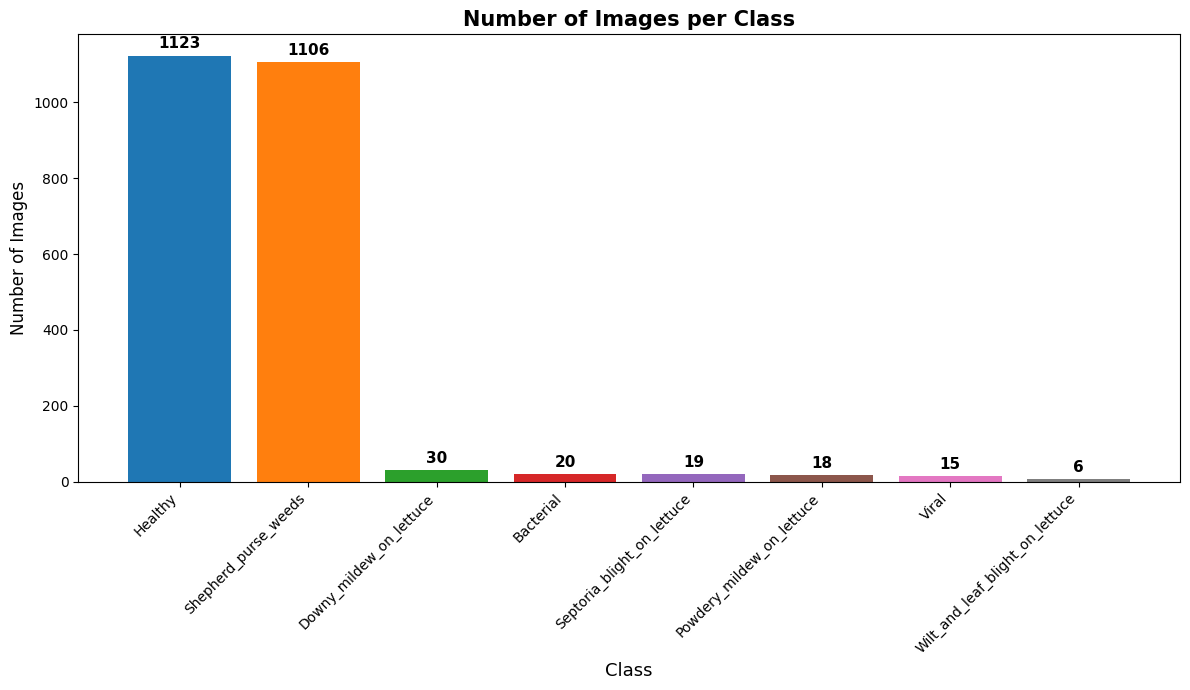

Class  Image Count
0                          Healthy         1123
1             Shepherd_purse_weeds         1106
2          Downy_mildew_on_lettuce           30
3                        Bacterial           20
4       Septoria_blight_on_lettuce           19
5        Powdery_mildew_on_lettuce           18
6                            Viral           15
7  Wilt_and_leaf_blight_on_lettuce            6

In [ ]:
import os
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import display, Markdown



def plot_image_counts(dataset_dir):
    """








    Visualize the number of images in each class folder as a barplot (descending order),








    and display a DataFrame with the counts. Adds count labels on bars.
    """


    class_folders = [
        d
        for d in os.listdir(dataset_dir)

        if os.path.isdir(os.path.join(dataset_dir, d))
    ]
    class_folders.sort()


    counts = []

    for class_name in class_folders:

        class_path = os.path.join(dataset_dir, class_name)
        n_images = len(

            [
                f
                for f in os.listdir(class_path)

                if os.path.isfile(os.path.join(class_path, f))
            ]
        )
        counts.append(n_images)


    # Create DataFrame and sort descending

    df = pd.DataFrame({"Class": class_folders, "Image Count": counts})

    df = df.sort_values("Image Count", ascending=False).reset_index(drop=True)

    # Plot


    plt.figure(figsize=(12, 7))

    palette = sns.color_palette("tab10", n_colors=len(df))

    bars = plt.bar(df["Class"], df["Image Count"], color=palette)

    plt.xlabel("Class", fontsize=13)

    plt.ylabel("Number of Images", fontsize=12)

    plt.title("Number of Images per Class", fontsize=15, fontweight="bold")


    plt.xticks(rotation=45, ha="right")

    # Add count labels on top of bars

    for bar in bars:
        height = bar.get_height()
        plt.annotate(

            f"{int(height)}",
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",

            va="bottom",
            fontsize=11,
            fontweight="bold",
        )


    plt.tight_layout()

    plt.show()

    display(df)



# Example usage:


plot_image_counts(r"F:\Lettuce_leaf_classification\Lettuce_disease_datasets")

### Data Imbalance 

    *   we can clearly visualize from the above plot that the dataset has imbalance.
    The number of Images for Healthy(HLTY) and Shephered Purse Weeds(SPW) are significantly higher than other classes.


    *   This data imbalnce will cause "BIAS" while learning , as it will have plenty of data to learn from Healthy and SPW classes but not a lot from rest of the classes .

    #we will handle this data imabalance by various Methodologies and Techniques such as SMOTE , Under/Over Sampling , Weighted Cross Entropy , Augmentation , etc .

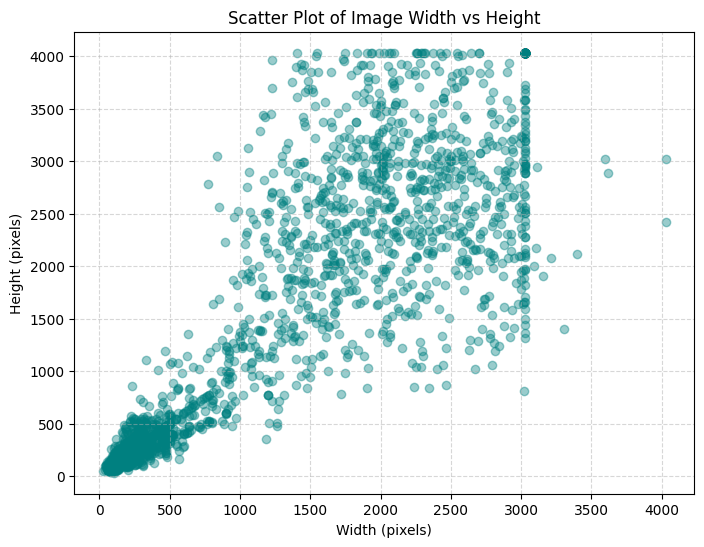

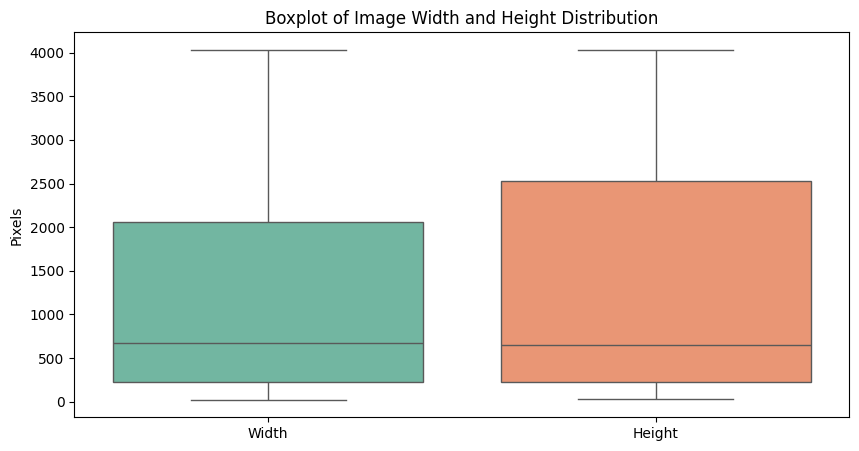

Width: min = 23 , max = 4032 , median = 668.0 , mean = 1160.7501069747539
Height: min = 33 , max = 4032 , median = 650.0 , mean = 1378.8378262729996



**How to Choose Resize Dimensions for Model Training**  

- The scatter plot above shows the spread of image sizes (width vs height) across the dataset.  

- The boxplot summarizes the distribution and highlights outliers.  

- For best results, choose a resize dimension close to the median or mean of both width and height, while considering model input requirements (e.g., 224x224, 256x256, 299x299).  

- Avoid resizing to a size much larger than most images, as it may introduce artifacts.  

- If aspect ratios vary greatly, consider center-cropping or padding after resizing.  

- Example: If most images are around 256x256, resizing to 224x224 or 256x256 is a good choice for most deep learning models.


In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Path to your dataset
dataset_path = r"F:\Lettuce_leaf_classification\Lettuce_disease_datasets"

# Automatically get all class folders
class_folders = [
    d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))
]
class_folders.sort()

widths, heights = [], []
for cls in class_folders:
    img_folder = os.path.join(dataset_path, cls)
    for img_name in os.listdir(img_folder):
        img_path = os.path.join(img_folder, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            h, w = img.shape[:2]
            widths.append(w)
            heights.append(h)

# Scatter plot of width vs height
plt.figure(figsize=(8, 6))
plt.scatter(widths, heights, alpha=0.4, color="teal")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.title("Scatter Plot of Image Width vs Height")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Boxplot for width and height
plt.figure(figsize=(10, 5))
sns.boxplot(data=[widths, heights], palette="Set2")
plt.xticks([0, 1], ["Width", "Height"])
plt.ylabel("Pixels")
plt.title("Boxplot of Image Width and Height Distribution")
plt.show()

# Print summary statistics for guidance
print(
    "Width: min =",
    np.min(widths),
    ", max =",
    np.max(widths),
    ", median =",
    np.median(widths),
    ", mean =",
    np.mean(widths),
)
print(
    "Height: min =",
    np.min(heights),
    ", max =",
    np.max(heights),
    ", median =",
    np.median(heights),
    ", mean =",
    np.mean(heights),
)

import pandas as pd
from IPython.display import display, Markdown

display(
    Markdown(
        """
**How to Choose Resize Dimensions for Model Training**  

- The scatter plot above shows the spread of image sizes (width vs height) across the dataset.  

- The boxplot summarizes the distribution and highlights outliers.  

- For best results, choose a resize dimension close to the median or mean of both width and height, while considering model input requirements (e.g., 224x224, 256x256, 299x299).  

- Avoid resizing to a size much larger than most images, as it may introduce artifacts.  

- If aspect ratios vary greatly, consider center-cropping or padding after resizing.  

- Example: If most images are around 256x256, resizing to 224x224 or 256x256 is a good choice for most deep learning models.
"""
    )
)